In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('IMDB-Movie-Data.csv')

In [7]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Duration,Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [9]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(df['title']))
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Title')
plt.axis('off')
plt.show()

KeyError: 'title'

In [10]:
df.shape

(1000, 12)

# so by info() method we get information like which column having int, float, object and which columns having null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Duration              1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [12]:
# calculating how many null values our data set 
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Duration                0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [13]:
# changing columns name
df = df.rename(columns={'Revenue (Millions)': 'Revenue'})

In [14]:
# converting all columns name in small-case
df.columns = [x.lower() for x in df.columns]

In [15]:
# to check it's done or not
df.head(2)

,rank,title,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [16]:
#according to requirement  making title as a index
df = df.set_index('title')

In [17]:
df.head(1)

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


In [18]:
# average of every movies duration
df['duration'].mean()

113.172

# in our dataset categorical columns are (genre, director, actors)
# checking which movie like action, adventure.... repeated how many time
# checking which actors working in more movies

 total number of movies with  Action = 303
 total number of movies with  Adventure = 259
 total number of movies with  Animation = 49
 total number of movies with  Biography = 81
 total number of movies with  Comedy = 279
 total number of movies with  Crime = 150
 total number of movies with  Drama = 513
 total number of movies with  Fantasy = 101
 total number of movies with  Family = 51
 total number of movies with  History = 29
 total number of movies with  Horror = 119
 total number of movies with  Music = 21
 total number of movies with  Musical = 5
 total number of movies with  Mystery = 106
 total number of movies with  Romance = 141
 total number of movies with  Sci-Fi = 120
 total number of movies with  Sport = 18
 total number of movies with  Thriller = 195
 total number of movies with  War = 13
 total number of movies with  Western = 7


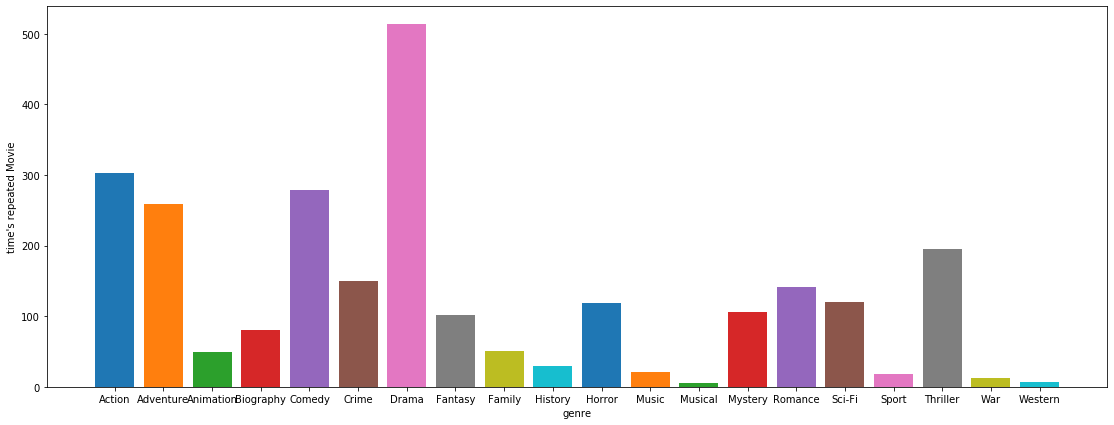

In [19]:
plt.figure(figsize=(19,7))
seperate_genre='Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Fantasy','Family','History','Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western'
for categ in seperate_genre:
    df2 = df['genre'].str.contains(categ).fillna(False)
    print(' total number of movies with ',categ,'=',len(df[df2]))
    plt.bar(categ, len(df[df2]))
    plt.xlabel('genre')
    plt.ylabel("time's repeated Movie")
    

In [20]:
# Make a function which clean the data
def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

#Apply that function to every entry    
movies_series = df['actors'].apply(repp)

#Declare a list to store the split values
actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])

#Declare a dictionary and see if the actor name key exist and then count accordingly.
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

actor_dict
   

{'Chris Pratt': 7,
 'Vin Diesel': 7,
 'Bradley Cooper': 11,
 'Zoe Saldan': 2,
 'Noomi Rapace': 5,
 'Logan Marshall-Green': 2,
 'Michael Fassbender': 12,
 'Charlize Thero': 1,
 'James McAvoy': 8,
 'Anya Taylor-Joy': 3,
 'Haley Lu Richardson': 2,
 'Jessica Sul': 1,
 'Matthew McConaughey': 8,
 'Reese Witherspoon': 4,
 'Seth MacFarlane': 4,
 'Scarlett Johansso': 1,
 'Will Smith': 10,
 'Jared Leto': 3,
 'Margot Robbie': 5,
 'Viola Davi': 1,
 'Matt Damon': 10,
 'Tian Jing': 1,
 'Willem Dafoe': 5,
 'Andy La': 1,
 'Ryan Gosling': 10,
 'Emma Stone': 9,
 'Rosemarie DeWitt': 1,
 'J.K. Simmon': 1,
 'Essie Davis': 2,
 'Andrea Riseborough': 2,
 'Julian Barratt': 1,
 'Kenneth Branag': 2,
 'Charlie Hunnam': 2,
 'Robert Pattinson': 6,
 'Sienna Miller': 5,
 'Tom Hollan': 1,
 'Jennifer Lawrence': 10,
 'Michael Sheen': 3,
 'Laurence Fishburn': 1,
 'Eddie Redmayne': 4,
 'Katherine Waterston': 1,
 'Alison Sudol': 1,
 'Dan Fogle': 1,
 'Taraji P. Henson': 2,
 'Octavia Spencer': 2,
 'Janelle Monáe': 1,
 'Kevin

# checking in every year how many movies are released
# How many films did every director make

In [21]:
# from 2006 to 2019 counting movies
df['year'].value_counts()

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: year, dtype: int64

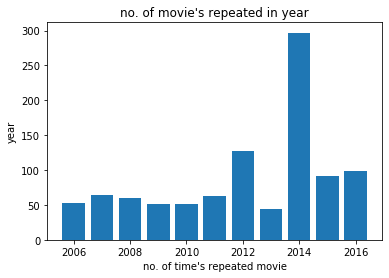

In [22]:
repeat = df['year'].value_counts().tolist()
year1 = df['year'].unique().tolist()

plt.bar(year1, repeat)
plt.xlabel("no. of time's repeated movie")
plt.ylabel("year")
plt.title("no. of movie's repeated in year")
plt.show()
plt.close()

In [23]:
repeat

[297, 127, 98, 91, 64, 63, 60, 53, 52, 51, 44]

In [24]:
# top 10 director
df['director'].value_counts()[:10]

Ridley Scott          8
Paul W.S. Anderson    6
M. Night Shyamalan    6
Michael Bay           6
David Yates           6
Woody Allen           5
Zack Snyder           5
David Fincher         5
Danny Boyle           5
Antoine Fuqua         5
Name: director, dtype: int64

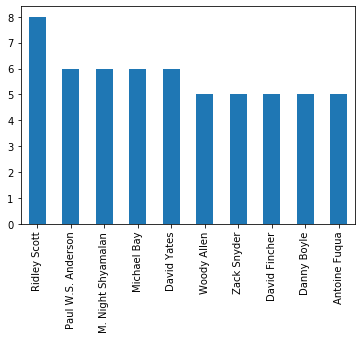

In [25]:
df['director'].value_counts()[:10].plot(kind = 'bar')

In [26]:
df.head(3)

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [27]:
# highest rating movies with all data
df.sort_values('rating', ascending=False)[:5]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
Dangal,118,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Kimi no na wa,97,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0


In [28]:
# highest votes movies with all data
df.sort_values('votes', ascending=False)[:5]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Avengers,77,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0


In [29]:
# highest revenue movies with all data
df.sort_values('revenue', ascending= False)[:5]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
Avatar,88,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
Jurassic World,86,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
The Avengers,77,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [30]:
#highest metascore movies will all data
df.sort_values('metascore', ascending=False)[:5]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Boyhood,657,Drama,"The life of Mason, from early childhood to his...",Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke...",2014,165,7.9,286722,25.36,100.0
Moonlight,42,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.85,99.0
Pan's Labyrinth,231,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0
12 Years a Slave,112,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0
Gravity,510,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,274.08,96.0


In [31]:
#top 5 highest duration movies name
df.sort_values('duration', ascending=False)[:5]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Grindhouse,829,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN
The Hateful Eight,89,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
Inland Empire,966,"Drama,Mystery,Thriller",As an actress starts to adopt the persona of h...,David Lynch,"Laura Dern, Jeremy Irons, Justin Theroux, Karo...",2006,180,7.0,44227,NaN,NaN
La vie d'Adèle,312,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
The Wolf of Wall Street,83,"Biography,Comedy,Crime","Based on the true story of Jordan Belfort, fro...",Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie,M...",2013,180,8.2,865134,116.87,75.0


In [32]:
df.head(2)

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


# Analysing on the rating columns is increase on which columns basis

In [33]:
# we are finded the rating columns is increase on the basis on votes columns here in the maximum vote range is ten-lakh 
df[:][(df['votes'] >= 1000000) ]


,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Avengers,77,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
Django Unchained,145,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,81.0


In [34]:
# the rating columns is not dedendent on metascore columns 
df[:][(df['metascore'] >= 90)][:5]

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Manchester by the Sea,22,Drama,A depressed uncle is asked to take care of his...,Kenneth Lonergan,"Casey Affleck, Michelle Williams, Kyle Chandle...",2016,137,7.9,134213,47.70,96.0
Moonlight,42,Drama,"A chronicle of the childhood, adolescence and ...",Barry Jenkins,"Mahershala Ali, Shariff Earp, Duan Sanderson, ...",2016,111,7.5,135095,27.85,99.0
Mad Max: Fury Road,68,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.0
12 Years a Slave,112,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0


In [35]:
cmp_g_R = df[['genre', 'rating']]

In [36]:
cmp_g_R[(cmp_g_R['rating'] == 9)]

,genre,rating
title,,
The Dark Knight,"Action,Crime,Drama",9.0


In [37]:
cmp_re_rat = df[['revenue', 'rating', 'votes', 'genre', 'metascore', 'actors']]

In [38]:
# as you can see when votes is increase then rating increasing
cmp_re_rat.sort_values('votes', ascending = False)[:10]

,revenue,rating,votes,genre,metascore,actors
title,,,,,,
The Dark Knight,533.32,9.0,1791916,"Action,Crime,Drama",82.0,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi..."
Inception,292.57,8.8,1583625,"Action,Adventure,Sci-Fi",74.0,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen..."
The Dark Knight Rises,448.13,8.5,1222645,"Action,Thriller",78.0,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ..."
Interstellar,187.99,8.6,1047747,"Adventure,Drama,Sci-Fi",74.0,"Matthew McConaughey, Anne Hathaway, Jessica Ch..."
The Avengers,623.28,8.1,1045588,"Action,Sci-Fi",69.0,"Robert Downey Jr., Chris Evans, Scarlett Johan..."
Django Unchained,162.80,8.4,1039115,"Drama,Western",81.0,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio..."
Inglourious Basterds,120.52,8.3,959065,"Adventure,Drama,War",69.0,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent"
The Departed,132.37,8.5,937414,"Crime,Drama,Thriller",85.0,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,..."
Avatar,760.51,7.8,935408,"Action,Adventure,Fantasy",83.0,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."


In [39]:
df[['genre', 'rating']][df['genre'].str.contains('Action')]

,genre,rating
title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Suicide Squad,"Action,Adventure,Fantasy",6.2
The Great Wall,"Action,Adventure,Fantasy",6.1
The Lost City of Z,"Action,Adventure,Biography",7.1
Rogue One,"Action,Adventure,Sci-Fi",7.9
Colossal,"Action,Comedy,Drama",6.4
Jason Bourne,"Action,Thriller",6.7
Independence Day: Resurgence,"Action,Adventure,Sci-Fi",5.3
Bahubali: The Beginning,"Action,Adventure,Drama",8.3


In [40]:
df[['genre', 'rating', 'votes']][df['genre'].str.contains('Drama')]

,genre,rating,votes
title,,,
La La Land,"Comedy,Drama,Music",8.3,258682
Passengers,"Adventure,Drama,Romance",7.0,192177
Hidden Figures,"Biography,Drama,History",7.8,93103
Colossal,"Action,Comedy,Drama",6.4,8612
Hacksaw Ridge,"Biography,Drama,History",8.2,211760
Lion,"Biography,Drama",8.1,102061
Arrival,"Drama,Mystery,Sci-Fi",8.0,340798
Gold,"Adventure,Drama,Thriller",6.7,19053
Manchester by the Sea,Drama,7.9,134213


In [41]:
df[['actors', 'rating']][df['actors'].str.contains('Christian Bale')]

,actors,rating
title,,
The Dark Knight,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",9.0
The Prestige,"Christian Bale, Hugh Jackman, Scarlett Johanss...",8.5
The Promise,"Oscar Isaac, Charlotte Le Bon, Christian Bale,...",5.9
The Dark Knight Rises,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",8.5
The Big Short,"Christian Bale, Steve Carell, Ryan Gosling, Br...",7.8
American Hustle,"Christian Bale, Amy Adams, Bradley Cooper,Jenn...",7.3
Exodus: Gods and Kings,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",6.0
Public Enemies,"Christian Bale, Johnny Depp, Christian Stolte,...",7.0
Knight of Cups,"Christian Bale, Cate Blanchett, Natalie Portma...",5.7


In [42]:
df_corr = df.corr()
df_corr

,rank,year,duration,rating,votes,revenue,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
duration,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
revenue,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


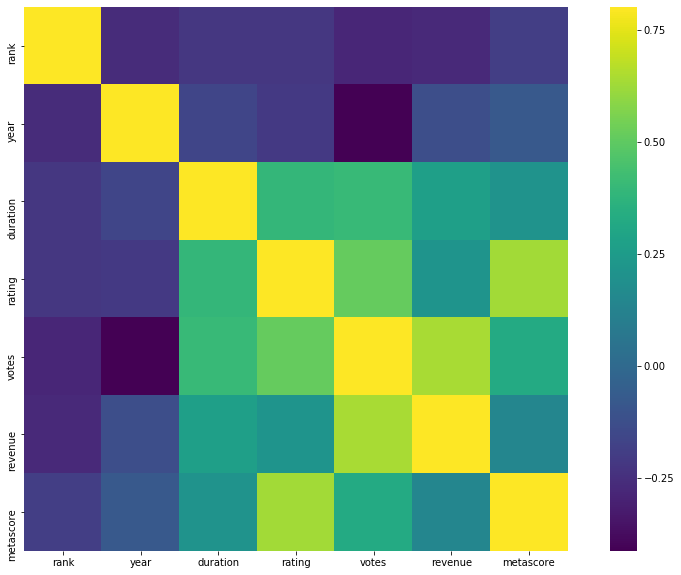

In [43]:
ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_corr, vmax=.8, square=True, cmap="viridis")

In [44]:
df.groupby('Year').sum()

KeyError: 'Year'

In [45]:
df.actors.plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [46]:
df[:][df.rating >= 8.0].head(10)

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Hacksaw Ridge,17,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0
Lion,19,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0
Arrival,20,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
Bahubali: The Beginning,27,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
Deadpool,34,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
Star Wars: Episode VII - The Force Awakens,51,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [47]:
df[df['director'].isin(['James Gunn', 'Tim Miller'])].head()

,rank,genre,description,director,actors,year,duration,rating,votes,revenue,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Deadpool,34,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0
Slither,909,"Comedy,Horror,Sci-Fi","A small town is taken over by an alien plague,...",James Gunn,"Nathan Fillion, Elizabeth Banks, Michael Rooke...",2006,95,6.5,64351,7.77,69.0
Super,938,"Comedy,Drama",After his wife falls under the influence of a ...,James Gunn,"Rainn Wilson, Ellen Page, Liv Tyler, Kevin Bacon",2010,96,6.8,64535,0.32,50.0


In [ ]:
y= df23[['Rank']]
x = df23[['Year']]

In [ ]:
plt.scatter(x, y)

In [ ]:
x.plot.pie(autopct='%0.1f%%', figsize = (10, 10))

In [ ]:
x = df['actors'].value_counts()[:10]

In [ ]:
df.Year.value_counts()

In [ ]:
df.title